In [501]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Setting up the Vacant Building DataSet

In [69]:
#publicBuilding = pd.read_csv('Public_Buildings_-_Dataset.csv')

VacantBuilding = pd.read_csv('Vacant_Buildings_-_Dataset.csv')
print(VacantBuilding.head())

#Set default column and values
#VacantBuilding['Latitude'] = 43.806
#VacantBuilding['Longitude'] = -79.194


VacantBuilding.loc[VacantBuilding['WARD'] == 1.0]
VacantBuilding.iloc[0:,7]

#print(VacantBuilding.iloc[1,7])

a= VacantBuilding['MAP LOCATION'].str.find(',')


# new data frame with split value columns 
new=VacantBuilding['MAP LOCATION'].str.split(",", n = 1, expand = True) 

#print(new[0])
    
# making seperate first name column from new data frame 
VacantBuilding['Latitude']= pd.to_numeric(new[0].str[1:]) #pd.to_numeric convert it to float

# making seperate last name column from new data frame 
VacantBuilding['Longitude']= pd.to_numeric(new[1].str.rstrip(')'))
#VacantBuilding['Longitude']= 
#print(VacantBuilding['Longitude'].str.rstrip(')'))
#VacantBuilding["Name"].str.find(sub) 

#VacantBuilding['date1'] = pd.to_datetime(VacantBuilding['VACANT AS OF'], format='%m/%d/%Y', utc=True)


VacantBuilding['Date']= pd.to_datetime(VacantBuilding['VACANT AS OF'])


print(VacantBuilding.head())
print(VacantBuilding.dtypes)

         ADDRESS            VACANT AS OF              DWELLING TYPE  \
0   663 3RD ST E  04/26/2011 12:00:00 AM   Multi-family Residential   
1   989 3RD ST E  11/01/2011 12:00:00 AM  Single Family Residential   
2  1457 3RD ST E  10/01/2014 12:00:00 AM  Single Family Residential   
3   249 4TH ST E  10/13/2016 12:00:00 AM                 Commercial   
4   767 4TH ST E  01/09/2009 12:00:00 AM                     Duplex   

   VACANT BUILDING CATEGORY  WARD  DISTRICT  CENSUS TRACT  \
0                         2   7.0       4.0       34400.0   
1                         2   7.0       4.0       34500.0   
2                         2   7.0       1.0       34602.0   
3                         2   2.0      17.0       34201.0   
4                         2   7.0       4.0       34500.0   

                           MAP LOCATION  
0  (44.9547963325615, -93.071254461297)  
1  (44.9568544056193, -93.058822503618)  
2  (44.9569709429740, -93.038835961878)  
3  (44.9487456956542, -93.085933397554

In [753]:
#Add  demographic Data
SPDem = pd.read_csv('MSP Neighborhoods_2013-2017.csv', skiprows=[1])
SPDem.columns = SPDem.columns.str.replace(' ', '')
SPDem['City'].value_counts().to_frame()
SPDem= SPDem.query('geography in ["Summit Hill","Hamline-Midway","Frogtown/Thomas-Dale","Union Park"]')

#SPDem.columns.values[i]

#for i,square in enumerate(SPDem.columns.values): 
#    print(str(i) + ' '+ square)
#print(SPDem)

for i,square in enumerate(SPDem.columns.values): 
    print(str(i) + ' '+ square)


SPDem = SPDem.iloc[:,[1,2,27,39,43,47,63,71,107,123,127,131,135,159,215,243,267,271,275,279,363,371,375,379,383,387,391,395,399,403,471,475,479,495,511,515,519,523]]

col_names= ['TotHH','Neigh','Unemploy','<HighSDip','HighSDip','AssDeg','BacDeg+','Foreign%','Child<18','Inc<35k','Inc_35to50','Inc_50to75','Inc75to100','Age65+','Renter','LangNotEng','Age18_24','Age25_34','Age35_44','Age45_54','Male','Race_Black','Race_Native','Race_Asian','Race_Other','Race_Two+','Race_His','Race_White','Race_POC','Poverty','Poverty_At','Poverty_100to150','Poverty_150to200','CarOwn','Commute<10','Commute_10to19','Commute_20-29','Commute_30+']

SPDem.columns= col_names



#for i,square in enumerate(SPDem.columns.values): 
#    print(str(i) + ' '+ square)

#SPDem.iloc[:,[1,6,7,8,13,14,16,17,18,19,20,21,23,25,26,27,29,33]]
#SPDem= SPDem.query('POLICEGRIDNUMBER in [86.0,87.0,88.0,89.0,67.0,68.0,66.0,106.0,107.0,108.0,109.0,110.0] and YEAROFSTOP in [2018,2019]') 


0 layer
1 TotalHouseholds(OccupiedUnits)-TotalHouseholds(OccupiedUnits)-count
2 geography
3 City
4 Residenceoneyearago-Population(1yearandoverinUS)-count
5 Residenceoneyearago-Population(1yearandoverinUS)-margin
6 Residenceoneyearago-Population(1yearandoverinUS)-share
7 Residenceoneyearago-Population(1yearandoverinUS)-sharemargin
8 Sameresidence-count
9 Sameresidence-margin
10 Sameresidence-share
11 Sameresidence-sharemargin
12 DifferentresidenceintheU.S.-count
13 DifferentresidenceintheU.S.-margin
14 DifferentresidenceintheU.S.-share
15 DifferentresidenceintheU.S.-sharemargin
16 DifferentresidenceoutsidetheU.S.-count
17 DifferentresidenceoutsidetheU.S.-margin
18 DifferentresidenceoutsidetheU.S.-share
19 DifferentresidenceoutsidetheU.S.-sharemargin
20 Civilianlaborforce-count
21 Civilianlaborforce-margin
22 Civilianlaborforce-share
23 Civilianlaborforce-sharemargin
24 Unemployed-count
25 Unemployed-margin
26 Unemployed-share
27 Unemployed-sharemargin
28 Disability-Totalpopulationforwho

In [725]:
TStop = pd.read_csv('Traffic_Stop_Dataset.csv')
TStop.columns = TStop.columns.str.replace(' ', '')

#Get Frogtown Grid Number
FG= TStop.query('POLICEGRIDNUMBER in [86.0,87.0,88.0,89.0,67.0,68.0,66.0,106.0,107.0,108.0,109.0,110.0] and YEAROFSTOP in [2018,2017]') 

#drop values of 'No Data'
FG= FG[FG.GENDEROFDRIVER != 'No Data']
FG= FG[FG.REASONFORSTOP != '911 Call / Citizen Reported']
FG= FG[FG.REASONFORSTOP != 'Investigative Stop']
FG= FG[FG.RACEOFDRIVER != 'Native American']

cols= ['Year','Date','Race','Gender','Dr_search','V_search','Citation','Age','Reason','Grid','GridLocation', 'Count']
FG.columns= cols
    
FG['Community']= FG['Grid'].apply(commun)    


#Time Variables
FG['Date']= pd.to_datetime(FG['Date'])
FG['DayofWeek']=FG['Date'].dt.dayofweek
FG['Weekend'] = FG['DayofWeek'].apply(lambda x: 1 if (x>4)  else 0)
FG['Month'] = FG['Date'].dt.month
FG['Day'] = FG['Date'].dt.day
FG['Hour'] = FG['Date'].dt.hour
FG['LateNight'] = FG['Hour'].apply(lambda x: 1 if (x>21 or x<5)  else 0)

#Replace variables with dummies
FG['Dr_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
FG['V_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
FG['Citation'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
FG['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) #replace male and female to dummy

FG.head()


,Year,Date,Race,Gender,Dr_search,V_search,Citation,Age,Reason,Grid,GridLocation,Count,Community,DayofWeek,Weekend,Month,Day,Hour,LateNight
677799,2017,2017-01-01 22:26:00,Black,0,0,0,1,37.0,Moving Violation,88.0,"(44.959348913, -93.131399604)",1,NaN,6,1,1,1,22,1
677802,2017,2017-01-01 23:20:00,Black,1,1,1,1,19.0,Equipment Violation,89.0,"(44.959355812, -93.121225856)",1,NaN,6,1,1,1,23,1
677810,2017,2017-01-02 08:49:00,Asian,0,0,0,0,NaN,Moving Violation,86.0,"(44.959354117, -93.151712719)",1,Frogtown,0,0,1,2,8,0
677814,2017,2017-01-02 10:31:00,White,1,0,0,0,NaN,Moving Violation,107.0,"(44.952131905, -93.141562703)",1,NaN,0,0,1,2,10,0
677829,2017,2017-01-02 18:12:00,Black,1,0,0,0,NaN,Equipment Violation,88.0,"(44.959348913, -93.131399604)",1,NaN,0,0,1,2,18,0


In [750]:
#Function

def commun(x): 
    if x in [67,68,87,88,89,90,91,92]:
        return 'Thomas-Frogtown'
    elif x in [5,6,7,8,25,26,27,28,45,46,47,48]:
        return 'Como'
    elif x in [107, 108, 109, 110,127,128,129,130]: 
        return 'Summit-University'
    elif x in [101,102,103,104,105,106,122,123,124,125,126]: 
        return 'Union Park'
    elif x in [63,64,65,66,83,84,85,86]: 
        return 'Midway' 
    elif x in [142,143,144,145,146,162,163,164,165,166]:
        return 'Macalester_Groveland'
    elif x in [182,183,184,185,186,202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Highland Park'
    elif x in [147,148,149,167,168]:
        return 'Summit Hill'
    elif x in [1,2,21,22,43,44,61,62,81,82]:
        return 'St. Anthony'
    elif x in [226,207,187,188,189,267,268,169,170,171,249,150,151,230]:
        return 'West 7th'
    elif x in [209,210,211,212,213,214,215,192,193,194,195,172,173,174,175]:
        return 'West Side'
    elif x in [111,112,131,132,133,152,153]:
        return 'Capital_River'
    elif x in [98,99,100,118,119,119,120,137,138,139,140,160,197,180,200,240,280]:
        return 'Battle_Creek'
    elif x in [76,95,96,97,115,116,117,138,114,136]:
        return 'Dayton Bluff' 
    elif x in [9,10,11,12,29,30,31,32,49,50,51,52,269,69,70,71,72]:
        return 'North End'
    elif x in [13,14,15,16,33,34,35,36,53,54,55,56,73,74,75,93,94]:
        return 'Payne-Phalen'
    elif x in [17,18,19,20,37,38,39,40,56,57,58,59,60,77,78,79,80]:
        return 'Greater East Side'
    else: 
        return 'NaN'

def district(x):
    if x in [1,2,3,4,5,6,7,8,21,22,23,24,25,26,27,28,43,44,45,46,47,48,\
            61,62,63,64,65,66,67,68,269,81,82,83,84,85,86,87,88,89,\
            101,102,103,104,105,106,107,108,109,110,122,123,124,125,126,\
            127,128,129,130,142,143,144,145,146,147,148,149,149,\
            162,163,164,165,166,167,168,182,183,184,185,186,\
            202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Western'
    elif x in [9,10,11,12,29,30,32,31,49,50,51,52,69,70,71,72,\
              90,91,92,111,112,131,132,133,267,268,249,130,230,\
              150,151,152,153,169,170,171,172,173,174,175,207,209,226,\
              187,188,189,192,193,194,195,210,211,212,213,214,215]:
        return 'Central'
    elif x in [13,14,15,16,17,18,19,20,33,34,35,36,37,38,39,40,\
              53,54,55,56,57,58,59,60,73,74,75,76,77,78,79,80,\
              93,94,95,96,97,98,99,100,114,115,116,117,118,119,120,\
              136,137,138,139,140,160,197,180,200,240,280]:
        return 'Eastern'
    else:
        return 'NaN'
    
    

In [751]:
#Get Frogtown Grid Number
SP_18= TStop.query('YEAROFSTOP in [2018]') 

#drop values of 'No Data'
SP_18= SP_18[SP_18.GENDEROFDRIVER != 'No Data']
SP_18= SP_18[SP_18.REASONFORSTOP != '911 Call / Citizen Reported']
SP_18= SP_18[SP_18.REASONFORSTOP != 'Investigative Stop']
SP_18= SP_18[SP_18.RACEOFDRIVER != 'Native American']

cols= ['Year','Date','Race','Gender','Dr_search','V_search','Citation','Age','Reason','Grid','GridLocation', 'Count']
SP_18.columns= cols

SP_18['Community']= SP_18['Grid'].apply(commun)
SP_18['District']= SP_18['Grid'].apply(district) 
SP_18= SP_18[SP_18.Community != 'NaN']


array([991., 993., 999., 996., 994.,  nan, 998., 989., 992., 997.])

In [ ]:
#Time Variables
FG['Date']= pd.to_datetime(FG['Date'])
FG['DayofWeek']=FG['Date'].dt.dayofweek
FG['Weekend'] = FG['DayofWeek'].apply(lambda x: 1 if (x>4)  else 0)
FG['Month'] = FG['Date'].dt.month
FG['Day'] = FG['Date'].dt.day
FG['Hour'] = FG['Date'].dt.hour
FG['LateNight'] = FG['Hour'].apply(lambda x: 1 if (x>21 or x<5)  else 0)

#Replace variables with dummies
FG['Dr_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
FG['V_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
FG['Citation'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
FG['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) #replace male and female to dummy


In [469]:

# Split Longitude and Latitiude
# new data frame with split value columns 
#new=FG['GridLocation'].str.split(",", n = 1, expand = True)    
# making seperate first name column from new data frame 
#FG['Latitude']= pd.to_numeric(new[0].str[1:]) #pd.to_numeric convert it to float
# making seperate last name column from new data frame 
#FG['Longitude']= pd.to_numeric(new[1].str.rstrip(')'))

# Define Age Function bins
def agef(x):
    if x<19: 
        return 'Teen <19'
    elif x>18 and x<25: 
        return 'Young Adult <25'
    elif x>25 and x<31: 
        return 'Adult <31'
    elif x>30 and x<46: 
        return 'Middle Adult <46' 
    elif x>45: 
        return 'Older Adult >45' 
    else: 
        return 'NaN'
    
FG['AgeDemo']= FG['Age'].apply(agef)

# Setup the communities



FG.head()
#type(FG['Date'])




Race    Reason             
Asian   Moving Violation        396
        Equipment Violation     133
Black   Moving Violation       2218
        Equipment Violation    1069
Latino  Moving Violation        185
        Equipment Violation      76
Other   Moving Violation        342
        Equipment Violation     108
White   Moving Violation       1621
        Equipment Violation     431
Name: Reason, dtype: int64


,Count,Eq_Margin,Mov_Margin,Citation_Count,Eq_Citation,Mov_Citation,Driversearch_Count,Eq_DriverSearch,Mov_DriverSearch,Eq_Gender_M,Mov_Gender_M,LateNight_Count,Eq_LateNight,Mov_LateNight,Morn_Citation,Late_Citation,Eq_Count,Mov_Count,Eq_,Mov_
Race,,,,,,,,,,,,,,,,,,,,
Asian,529,0.251418,0.748582,228,0.240602,0.494949,27,0.060150,0.047980,0.203008,0.340909,183,0.503759,0.292929,0.543353,0.218579,0.251418,0.748582,0.251418,0.748582
Black,3287,0.325221,0.674779,1213,0.218896,0.441389,453,0.154350,0.129847,0.304958,0.333183,1460,0.564079,0.386384,0.500821,0.204110,0.325221,0.674779,0.325221,0.674779
Latino,261,0.291188,0.708812,123,0.157895,0.600000,14,0.078947,0.043243,0.368421,0.302703,90,0.486842,0.286486,0.596491,0.233333,0.291188,0.708812,0.291188,0.708812
Other,450,0.240000,0.760000,197,0.222222,0.505848,22,0.083333,0.038012,0.342593,0.359649,149,0.564815,0.257310,0.551495,0.208054,0.240000,0.760000,0.240000,0.760000
White,2052,0.210039,0.789961,1134,0.164733,0.655768,107,0.106729,0.037631,0.378190,0.411474,528,0.519722,0.187539,0.677822,0.191288,0.210039,0.789961,0.210039,0.789961


# Sample Code to get some indexing

df = pd.DataFrame({"Name":["A","A","A","A","A","B","B","B","B","B"],\
                    "City":["EQ","MV","EQ","MV","EQ","MV","EQ","MV","EQ",'MV'],\
                    "Late":[0,0,1,1,1,0,0,0,1,1], "Citation":[0,0,1,1,1,0,0,1,1,1]})

data = [['A',0.1,0.1,0.1,0.1],['B',0.1,0.1,0.1,0.1]]
Met = pd.DataFrame(data, columns= ['Block','E_Late','M_Late','E_Cit','M_Cit'])
Met.set_index('Block', inplace=True)                   

c= ['Name','City','Late']
df1 = pd.DataFrame({c[0]:[],c[1]:[],c[2]:[],'Value':[]})
print(c[1])
for i in range(0,8):
    h=round(df.groupby([c[0],c[1]])[c[2]].value_counts(normalize=True),4)
    g=df.groupby([c[0],c[1]])[c[2]].value_counts(normalize=True).index.tolist()
    if g[i][2] == 1:
        df1= df1.append(pd.Series([g[i][0], g[i][1], g[i][2], h[i]], index=df1.columns), ignore_index=True)
    else:
        pass

Met.set_value('A','E_Late', df1.loc[0][3])    
Met.set_value('B','E_Late', df1.loc[2][3])  
Met.set_value('A','M_Late', df1.loc[1][3])    
Met.set_value('B','M_Late', df1.loc[3][3]) 


c= ['Name','City','Late']
h=round(df.groupby([c[0],c[1]])[c[2]].value_counts(normalize=True),4)
Met.set_value('A','E_Late', h[0])    
Met.set_value('B','E_Late', h[5])  
Met.set_value('A','M_Late', h[3])    
Met.set_value('B','M_Late', h[7]) 


    



In [592]:
# Test dummy



# Exploratory Data Analysis

In [595]:

print(FG.shape)

data = [['Asian',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5], ['Black', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Latino', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5], ['Other', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
       ['White',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5]] 

Rc_Met = pd.DataFrame(data, columns= ['Race','Tot_Count','Eq_Count','Mov_Count','Eq_Margin','Mov_Margin','Citation_Count','Eq_Citation',\
                                      'Mov_Citation','Driversearch_Count','Eq_DriverSearch','Mov_DriverSearch',\
                                      'Eq_Gender_F','Mov_Gender_F','LateNight_Count','Eq_LateNight','Mov_LateNight',\
                                      'Morn_Citation','Late_Citation'])

Rc_Met.set_index('Race', inplace=True)

#print(round(FG.groupby(['Race'])['LateN'].value_counts().sort_index(level=1),4))
                      
#Find unique values of data set and set of values

A=round(FG['Race'].value_counts().sort_index(level=1),4)
Rc_Met.set_value('Asian','Tot_Count', A[0])
Rc_Met.set_value('Black','Tot_Count', A[1])
Rc_Met.set_value('Latino','Tot_Count', A[2])
Rc_Met.set_value('Other','Tot_Count', A[3])
Rc_Met.set_value('White','Tot_Count', A[4])


A= round(FG.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)
Rc_Met.set_value('Asian','Eq_Count', A[0])
Rc_Met.set_value('Black','Eq_Count', A[1])
Rc_Met.set_value('Latino','Eq_Count', A[2])
Rc_Met.set_value('Other','Eq_Count', A[3])
Rc_Met.set_value('White','Eq_Count', A[4])
Rc_Met.set_value('Asian','Mov_Count', A[5])
Rc_Met.set_value('Black','Mov_Count', A[6])
Rc_Met.set_value('Latino','Mov_Count', A[7])
Rc_Met.set_value('Other','Mov_Count', A[8])
Rc_Met.set_value('White','Mov_Count', A[9])


A= round(FG.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)
Rc_Met.set_value('Asian','Eq_Margin', A[0])
Rc_Met.set_value('Black','Eq_Margin', A[1])
Rc_Met.set_value('Latino','Eq_Margin', A[2])
Rc_Met.set_value('Other','Eq_Margin', A[3])
Rc_Met.set_value('White','Eq_Margin', A[4])
Rc_Met.set_value('Asian','Mov_Margin', A[5])
Rc_Met.set_value('Black','Mov_Margin', A[6])
Rc_Met.set_value('Latino','Mov_Margin', A[7])
Rc_Met.set_value('Other','Mov_Margin', A[8])
Rc_Met.set_value('White','Mov_Margin', A[9])

A=round(FG.groupby(['Race'])['Citation'].value_counts().sort_index(level=1),4)
Rc_Met.set_value('Asian','Citation_Count', A[0])
Rc_Met.set_value('Black','Citation_Count', A[1])
Rc_Met.set_value('Latino','Citation_Count', A[2])
Rc_Met.set_value('Other','Citation_Count', A[3])
Rc_Met.set_value('White','Citation_Count', A[4])

A= round(FG.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Rc_Met.set_value('Asian','Eq_Citation', A[10])
Rc_Met.set_value('Black','Eq_Citation', A[12])
Rc_Met.set_value('Latino','Eq_Citation', A[14])
Rc_Met.set_value('Other','Eq_Citation', A[16])
Rc_Met.set_value('White','Eq_Citation', A[18])
Rc_Met.set_value('Asian','Mov_Citation', A[11])
Rc_Met.set_value('Black','Mov_Citation', A[13])
Rc_Met.set_value('Latino','Mov_Citation', A[15])
Rc_Met.set_value('Other','Mov_Citation', A[17])
Rc_Met.set_value('White','Mov_Citation', A[19])

A=round(FG.groupby(['Race'])['Dr_search'].value_counts().sort_index(level=1),4)
Rc_Met.set_value('Asian','Driversearch_Count', A[0])
Rc_Met.set_value('Black','Driversearch_Count', A[1])
Rc_Met.set_value('Latino','Driversearch_Count', A[2])
Rc_Met.set_value('Other','Driversearch_Count', A[3])
Rc_Met.set_value('White','Driversearch_Count', A[4])

A= round(FG.groupby(['Race','Reason'])['Dr_search'].value_counts(normalize=True).sort_index(level=2),4)
Rc_Met.set_value('Asian','Eq_DriverSearch', A[10])
Rc_Met.set_value('Black','Eq_DriverSearch', A[12])
Rc_Met.set_value('Latino','Eq_DriverSearch', A[14])
Rc_Met.set_value('Other','Eq_DriverSearch', A[16])
Rc_Met.set_value('White','Eq_DriverSearch', A[18])
Rc_Met.set_value('Asian','Mov_DriverSearch', A[11])
Rc_Met.set_value('Black','Mov_DriverSearch', A[13])
Rc_Met.set_value('Latino','Mov_DriverSearch', A[15])
Rc_Met.set_value('Other','Mov_DriverSearch', A[17])
Rc_Met.set_value('White','Mov_DriverSearch', A[19])

A=round(FG.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)
Rc_Met.set_value('Asian','Eq_Gender_F', A[10])
Rc_Met.set_value('Black','Eq_Gender_F', A[12])
Rc_Met.set_value('Latino','Eq_Gender_F', A[14])
Rc_Met.set_value('Other','Eq_Gender_F', A[16])
Rc_Met.set_value('White','Eq_Gender_F', A[18])
Rc_Met.set_value('Asian','Mov_Gender_F', A[11])
Rc_Met.set_value('Black','Mov_Gender_F', A[13])
Rc_Met.set_value('Latino','Mov_Gender_F', A[15])
Rc_Met.set_value('Other','Mov_Gender_F', A[17])
Rc_Met.set_value('White','Mov_Gender_F', A[19])

A=round(FG.groupby(['Race'])['LateNight'].value_counts().sort_index(level=1),4)
Rc_Met.set_value('Asian','LateNight_Count', A[0])
Rc_Met.set_value('Black','LateNight_Count', A[1])
Rc_Met.set_value('Latino','LateNight_Count', A[2])
Rc_Met.set_value('Other','LateNight_Count', A[3])
Rc_Met.set_value('White','LateNight_Count', A[4])

A=round(FG.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)
Rc_Met.set_value('Asian','Eq_LateNight', A[10])
Rc_Met.set_value('Black','Eq_LateNight', A[12])
Rc_Met.set_value('Latino','Eq_LateNight', A[14])
Rc_Met.set_value('Other','Eq_LateNight', A[16])
Rc_Met.set_value('White','Eq_LateNight', A[18])
Rc_Met.set_value('Asian','Mov_LateNight', A[11])
Rc_Met.set_value('Black','Mov_LateNight', A[13])
Rc_Met.set_value('Latino','Mov_LateNight', A[15])
Rc_Met.set_value('Other','Mov_LateNight', A[17])
Rc_Met.set_value('White','Mov_LateNight', A[19])

#1/3 of data is done during latenight activities
A=round(FG.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Rc_Met.set_value('Asian','Morn_Citation', A[10])
Rc_Met.set_value('Black','Morn_Citation', A[12])
Rc_Met.set_value('Latino','Morn_Citation', A[14])
Rc_Met.set_value('Other','Morn_Citation', A[16])
Rc_Met.set_value('White','Morn_Citation', A[18])
Rc_Met.set_value('Asian','Late_Citation', A[11])
Rc_Met.set_value('Black','Late_Citation', A[13])
Rc_Met.set_value('Latino','Late_Citation', A[15])
Rc_Met.set_value('Other','Late_Citation', A[17])
Rc_Met.set_value('White','Late_Citation', A[19])


#print(round(FG.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=1),4))
#= A[2]
#'Eq_Margin','Mov_Margin','Eq_Citation','Mov_Citation','Eq_DriverSearch',
#Rc_Met.iloc[2][1] = A[4]
#Rc_Met.iloc[3][1] = A[3]
#Rc_Met.iloc[4][1] = A[1]

print(Rc_Met)




(6579, 27)
        Tot_Count  Eq_Count  Mov_Count  Eq_Margin  Mov_Margin  Citation_Count  \
Race                                                                            
Asian         529       133        396     0.2514      0.7486             301   
Black        3287      1069       2218     0.3252      0.6748            2074   
Latino        261        76        185     0.2912      0.7088             138   
Other         450       108        342     0.2400      0.7600             253   
White        2052       431       1621     0.2100      0.7900             918   

        Eq_Citation  Mov_Citation  Driversearch_Count  Eq_DriverSearch  \
Race                                                                     
Asian        0.2406        0.4949                 502           0.0602   
Black        0.2189        0.4414                2834           0.1543   
Latino       0.1579        0.6000                 247           0.0789   
Other        0.2222        0.5058                 4

A few summary points of the sample

1. Black people are stopped 1 out 3 times for equipment violation, while white people are stopped for equipment violations 1 out 5 times
2. Blacks are stopped 50% of the time, followed by whites 30% of time
3. Blacks only recieve 1/3 of citations; Latinos have nearly 1/2 of citations; foreveryone else its around 55%
4. Blacks drivers get searched nearly 14% of the time, while for others it is 5%; Vehicle search is very similar
5. White Women have 40% likelihood of being stopped; for other women it's around 1/3
6. Blacks have 44% of traffic stops during late night; in comparison, for white drivers it is 25%. This may suggest there might be a localized effect 

Race                Asian  Black  Latino  Other  White
Tot_Count             529   3287     261    450   2052
Eq_Count              133   1069      76    108    431
Mov_Count             396   2218     185    342   1621
LateNight_Count       346   1827     171    301   1524
Citation_Count        301   2074     138    253    918
Driversearch_Count    502   2834     247    428   1945


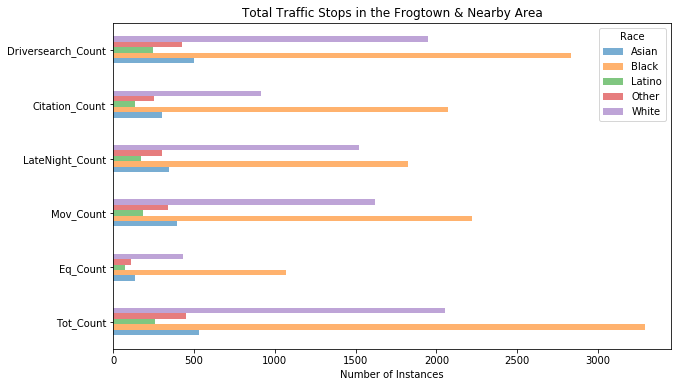

In [596]:
#tables 

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Rc_Met.head()
#Features= ['Eq_Margin', 'Mov_Margin', 'Eq_Citation','Mov_Citation', 'Eq_DriverSearch','Mov_DriverSearch' ]
Features= ['Tot_Count','Eq_Count', 'Mov_Count','LateNight_Count', 'Citation_Count','Driversearch_Count']
df_t= Rc_Met[Features]

df_t = df_t.transpose()

print(df_t)

df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Total Traffic Stops in the Frogtown & Nearby Area')
plt.ylabel('')
plt.xlabel('Number of Instances')
#xticks(np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue'))

plt.show()


In [ ]:
# Lets dicuss when citations are being made

In [600]:

Features= ['Eq_Margin','Eq_Citation','Eq_DriverSearch','Eq_Gender_F','Eq_LateNight' ]
df_t= Rc_Met[Features]

df_t = df_t.transpose()

print(df_t)

df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Equipment Violation in the Frogtown & Nearby Area'')
plt.ylabel('')
plt.xlabel('')

plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-600-1c601d1a423e>, line 11)

Race               Asian   Black  Latino   Other   White
Mov_Margin        0.7486  0.6748  0.7088  0.7600  0.7900
Mov_Citation      0.4949  0.4414  0.6000  0.5058  0.6558
Mov_DriverSearch  0.0480  0.1298  0.0432  0.0380  0.0376
Mov_Gender_F      0.3409  0.3332  0.3027  0.3596  0.4115
Mov_LateNight     0.2929  0.3864  0.2865  0.2573  0.1875


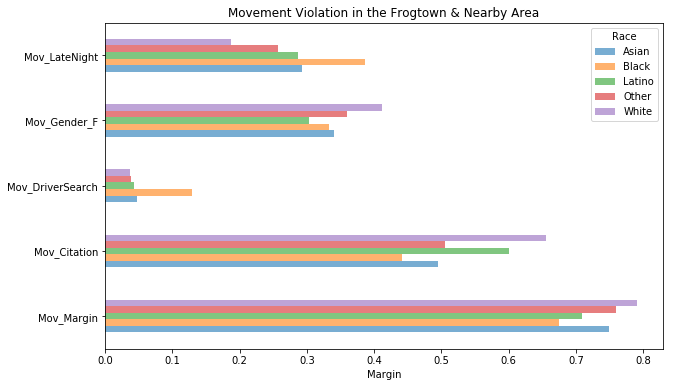

In [599]:
Features= ['Mov_Margin','Mov_Citation','Mov_DriverSearch','Mov_Gender_F','Mov_LateNight' ]
df_t= Rc_Met[Features]

df_t = df_t.transpose()

print(df_t)

df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Movement Violation in the Frogtown & Nearby Area')
plt.ylabel('')
plt.xlabel('')

plt.show()

Race            Asian   Black  Latino   Other   White
Morn_Citation  0.5434  0.5008  0.5965  0.5515  0.6778
Late_Citation  0.2186  0.2041  0.2333  0.2081  0.1913


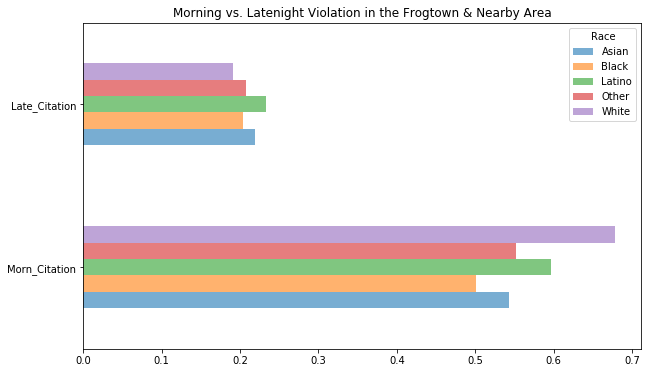

In [601]:
Features= ['Morn_Citation','Late_Citation']
df_t= Rc_Met[Features]

df_t = df_t.transpose()

print(df_t)

df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Morning vs. Latenight Citations in the Frogtown & Nearby Area')
plt.ylabel('')
plt.xlabel('')

plt.show()

In [301]:
#strongly correlated with recieving a citation
print(FG['AgeDemo'].value_counts().to_frame()) #so many missing data to say much
print(FG['Community'].value_counts().to_frame()) #based on design
print(FG['Month'].value_counts().to_frame())
print(FG['DayofWeek'].value_counts().to_frame())

                  AgeDemo
NaN                  4481
Middle Adult <46      672
Older Adult >45       501
Young Adult <25       470
Adult <31             388
Teen <19               67
                   Community
Frogtown                3948
Summit-University       1900
Union City               428
Midway                   303
   LateNight
0       4169
1       2410
    Month
4     773
3     765
5     699
7     600
8     540
6     523
2     503
12    501
11    469
1     453
10    394
9     359
   DayofWeek
2       1147
3       1136
1       1076
0        953
4        823
5        774
6        670
LateNight  Reason             
0          Moving Violation       0.802111
           Equipment Violation    0.197889
1          Moving Violation       0.588382
           Equipment Violation    0.411618
Name: Reason, dtype: float64
LateNight  Citation
0          1           0.576637
           0           0.423363
1          0           0.796266
           1           0.203734
Name: Citation, dtyp

1. Over 1/3 of citations occur at late night
2. During late night, equipment violations are more likely reason to stop driver; However, less citations are issued during late night compared to the day time (20% vs 58%). The discrepancy is huge
3. Traffic stops are more frequent on the Spring/Summer months and less on Winter/Fall months
4. Suprisingly the middle of the week days have the greatest number of citations; The weekend has less people driving. Though Friday has also less stops


# Let's do a neighborhood analysis focus on Frogtown

In [718]:
#print(FG['Community'].value_counts().to_frame())
#print(FG.groupby(['Community'])['Race'].value_counts(normalize=True))

#The frogtown and the Summit University community are very similar in demographics

# Collection of dummies
#FG=pd.concat([FG,pd.get_dummies(FG['Reason'])], axis=1)
#FG=pd.concat([FG,pd.get_dummies(FG['Race'])], axis=1)

#GroupBy Conditions!

#print(FG.head())



Features= ['Grid','Count','Citation','Equipment Violation','Moving Violation','Dr_search','V_search','LateNight',\
          'Asian','Black','Latino','White','Other','Gender','Weekend']

#Features2= ['Citation','Equipment Violation','Moving Violation','Dr_search','V_search','LateNight',\
#          'Asian','Black','Latino','White','Other','Gender']

B= FG[Features].groupby(['Grid']).sum()
C= B['Count']
B=B.div(B['Count'].values,axis=0)
B['Count']=C 

type(B)

#FG.groupby(['Grid','Year']).sum()
B=B.reset_index()
B.Grid = B.Grid.astype(int)
B.Grid = B.Grid.astype(str)
B

,Grid,Count,Citation,Equipment Violation,Moving Violation,Dr_search,V_search,LateNight,Asian,Black,Latino,White,Other,Gender,Weekend
0,66,303,0.729373,0.128713,0.871287,0.033003,0.033003,0.108911,0.056106,0.247525,0.039604,0.584158,0.072607,0.491749,0.089109
1,67,412,0.677184,0.145631,0.854369,0.029126,0.024272,0.174757,0.055825,0.342233,0.033981,0.478155,0.089806,0.434466,0.111650
2,68,210,0.476190,0.252381,0.747619,0.133333,0.095238,0.338095,0.114286,0.447619,0.047619,0.319048,0.071429,0.371429,0.209524
3,86,454,0.378855,0.308370,0.691630,0.088106,0.077093,0.411894,0.033040,0.484581,0.033040,0.376652,0.072687,0.378855,0.242291
4,87,832,0.342548,0.337740,0.662260,0.104567,0.090144,0.456731,0.063702,0.542067,0.026442,0.284856,0.082933,0.366587,0.240385
5,88,855,0.308772,0.364912,0.635088,0.134503,0.115789,0.477193,0.098246,0.592982,0.045614,0.207018,0.056140,0.287719,0.260819
6,89,1185,0.427004,0.301266,0.698734,0.115612,0.103797,0.404219,0.129958,0.521519,0.040506,0.256540,0.051477,0.328270,0.212658
7,106,428,0.509346,0.200935,0.799065,0.067757,0.058411,0.264019,0.058411,0.387850,0.037383,0.422897,0.093458,0.352804,0.250000
8,107,490,0.375510,0.273469,0.726531,0.108163,0.102041,0.385714,0.046939,0.548980,0.032653,0.302041,0.069388,0.353061,0.267347
9,108,524,0.482824,0.225191,0.774809,0.072519,0.068702,0.290076,0.047710,0.614504,0.043893,0.242366,0.051527,0.351145,0.169847


In [674]:
#import Programs
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library


world_geo = r'Saint Paul Police Grid - Shapefile.geojson'

#Feature(geometry=Geometry(type=MultiPolygon, coordinates=[[[[-932374139]]]], 
#                          bbox=(-93.21239362)), properties={'dist': 'Western District', 'gridnum': '82'})

In [712]:

#Create San Fran Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

FG_map.choropleth(
    geo_data=world_geo,
    data=B,
    columns=['Grid','Equipment Violation'],
    key_on="feature.properties.gridnum", #The District need to be selected
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total'
)

# display map
FG_map

0      66
1      67
2      68
3      86
4      87
5      88
6      89
7     106
8     107
9     108
10    109
11    110
Name: Grid, dtype: object


In [722]:
B

,Grid,Count,Citation,Equipment Violation,Moving Violation,Dr_search,V_search,LateNight,Asian,Black,Latino,White,Other,Gender,Weekend
0,66,303,0.729373,0.128713,0.871287,0.033003,0.033003,0.108911,0.056106,0.247525,0.039604,0.584158,0.072607,0.491749,0.089109
1,67,412,0.677184,0.145631,0.854369,0.029126,0.024272,0.174757,0.055825,0.342233,0.033981,0.478155,0.089806,0.434466,0.111650
2,68,210,0.476190,0.252381,0.747619,0.133333,0.095238,0.338095,0.114286,0.447619,0.047619,0.319048,0.071429,0.371429,0.209524
3,86,454,0.378855,0.308370,0.691630,0.088106,0.077093,0.411894,0.033040,0.484581,0.033040,0.376652,0.072687,0.378855,0.242291
4,87,832,0.342548,0.337740,0.662260,0.104567,0.090144,0.456731,0.063702,0.542067,0.026442,0.284856,0.082933,0.366587,0.240385
5,88,855,0.308772,0.364912,0.635088,0.134503,0.115789,0.477193,0.098246,0.592982,0.045614,0.207018,0.056140,0.287719,0.260819
6,89,1185,0.427004,0.301266,0.698734,0.115612,0.103797,0.404219,0.129958,0.521519,0.040506,0.256540,0.051477,0.328270,0.212658
7,106,428,0.509346,0.200935,0.799065,0.067757,0.058411,0.264019,0.058411,0.387850,0.037383,0.422897,0.093458,0.352804,0.250000
8,107,490,0.375510,0.273469,0.726531,0.108163,0.102041,0.385714,0.046939,0.548980,0.032653,0.302041,0.069388,0.353061,0.267347
9,108,524,0.482824,0.225191,0.774809,0.072519,0.068702,0.290076,0.047710,0.614504,0.043893,0.242366,0.051527,0.351145,0.169847


In [720]:
#Create San Fran Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

FG_map.choropleth(
    geo_data=world_geo,
    data=B,
    columns=['Grid','LateNight'],
    key_on="feature.properties.gridnum", #The District need to be selected
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total'
)

# display map
FG_map

In [604]:
#FG.head()

In [279]:
# Exmpale for whole city


(142, 22)
                               LOCATIONOFSTOPBYPOLICEGRID
(44.959355812, -93.121225856)                          31
(44.959348913, -93.131399604)                          20
(44.959369203, -93.141547469)                          19
(44.952131905, -93.141562703)                          13
(44.96658643, -93.131386726)                           11
(44.96660293, -93.14154461)                            10
(44.959354117, -93.151712719)                           9
(44.952142439, -93.121215953)                           8
(44.952073936, -93.11116233)                            7
(44.95212662, -93.151733368)                            7
(44.952135078, -93.131382905)                           5
(44.966853003, -93.151742393)                           2


In [190]:

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoodsTorD['Latitude'], neighborhoodsTorD['Longitude'], neighborhoodsTorD['Bourough'], neighborhoodsTorD['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoodsTorC['Latitude'], neighborhoodsTorC['Longitude'], neighborhoodsTorC['Bourough'], neighborhoodsTorC['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ff6666',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)      

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoodsTorE['Latitude'], neighborhoodsTorE['Longitude'], neighborhoodsTorE['Bourough'], neighborhoodsTorE['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#ffff66',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
    
# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoodsTorW['Latitude'], neighborhoodsTorW['Longitude'], neighborhoodsTorW['Bourough'], neighborhoodsTorW['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#66ff66',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)      



                 RACEOFDRIVER
Black                    3472
White                    2128
Asian                     552
Other                     482
Latino                    271
Native American            31
      YEAROFSTOP
2017        3968
2018        2968
        GENDEROFDRIVER
Male              4555
Female            2381
     DRIVERSEARCHED?
No              6195
Yes              741
     VEHICLESEARCHED?
No               6284
Yes               652
     CITATIONISSUED?
No              3985
Yes             2951
      AGEOFDRIVER
25.0          103
22.0           99
24.0           97
23.0           94
26.0           88
29.0           88
27.0           79
20.0           76
30.0           70
28.0           68
32.0           67
31.0           65
19.0           62
38.0           60
34.0           54
21.0           54
35.0           53
33.0           51
39.0           48
18.0           47
37.0           45
41.0           41
36.0           39
45.0           35
43.0           35
50.0      

YEAROFSTOP                       0
DATEOFSTOP                       0
RACEOFDRIVER                     0
GENDEROFDRIVER                   0
DRIVERSEARCHED?                  0
VEHICLESEARCHED?                 0
CITATIONISSUED?                  0
AGEOFDRIVER                   4700
REASONFORSTOP                    0
POLICEGRIDNUMBER                 0
LOCATIONOFSTOPBYPOLICEGRID       0
COUNT                            0
Date                             0
DayofWeek                        0
Weekend                          0
Month                            0
Day                              0
Hour                             0
LateNight                        0
dtype: int64